In [486]:
import pandas as pd

In [487]:
ls

BalBagging_Multiclass.pkl
JUPU1.ipynb
Jupu3.ipynb
TEST_Dataset_1_Predictive_Maintenance copy.csv
TRAIN_Dataset_1_Predictive_Maintenance.csv
jupu2.ipynb
tree.dot


# Import Train and Test data

In [488]:
df=pd.read_csv("TRAIN_Dataset_1_Predictive_Maintenance.csv")
dftest=pd.read_csv("TEST_Dataset_1_Predictive_Maintenance COPY.csv")

In [489]:
df

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,7389,7390,L54569,L,299.8,310.6,1707,32.5,124,0,0,0,0,0,0
1,9275,9276,L56455,L,298.2,308.7,1605,29.4,47,0,0,0,0,0,0
2,2995,2996,L50175,L,300.5,309.8,1550,37.4,148,0,0,0,0,0,0
3,5316,5317,M20176,M,303.6,312.8,1689,33.1,16,0,0,0,0,0,0
4,356,357,M15216,M,297.6,308.4,1398,48.9,63,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9225,9226,L56405,L,298.0,309.1,1820,23.6,120,0,0,0,0,0,0
7996,4859,4860,L52039,L,303.7,312.4,1535,38.6,107,0,0,0,0,0,0
7997,3264,3265,H32678,H,301.3,310.1,1455,44.1,188,0,0,0,0,0,0
7998,9845,9846,L57025,L,298.3,309.1,1421,47.4,33,0,0,0,0,0,0


# Separate inputs and Target

In [504]:
data = df[["Air temperature [K]",
           "Process temperature [K]",
           "Rotational speed [rpm]",
           "Torque [Nm]",
           "Tool wear [min]"]]

input_and_target = df[["Air temperature [K]",
           "Process temperature [K]",
           "Rotational speed [rpm]",
           "Torque [Nm]",
           "Tool wear [min]", "Machine failure"]]

torque_and_rotspeed=df[[
           "Rotational speed [rpm]",
           "Torque [Nm]",
         "Machine failure"]]


input_target= df[["Air temperature [K]",
           "Process temperature [K]",
           "Rotational speed [rpm]",
           "Torque [Nm]",
           "Tool wear [min]", "Machine failure"]]

testinput = dftest[["Air temperature [K]",
           "Process temperature [K]",
           "Rotational speed [rpm]",
           "Torque [Nm]",
           "Tool wear [min]"]]
data


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,299.8,310.6,1707,32.5,124
1,298.2,308.7,1605,29.4,47
2,300.5,309.8,1550,37.4,148
3,303.6,312.8,1689,33.1,16
4,297.6,308.4,1398,48.9,63
...,...,...,...,...,...
7995,298.0,309.1,1820,23.6,120
7996,303.7,312.4,1535,38.6,107
7997,301.3,310.1,1455,44.1,188
7998,298.3,309.1,1421,47.4,33


In [491]:
target_all = df[["Machine failure",
             "TWF",
             "HDF",
             "PWF",
             "OSF",
             "RNF"]]


In [502]:
target2=df['Machine failure']
test_target2=dftest['Machine failure']
target2

0       0
1       0
2       0
3       0
4       0
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: Machine failure, Length: 8000, dtype: int64

# EDA

### Feature importance

In [493]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
data, target2 = make_classification(n_samples=8000, n_features=11, n_informative=6, n_redundant=5, random_state=1)


Feature 0: Air Temperature,     Score:0.11488
Feature 1: Process Temperature, Score:0.05378
Feature 2: Torque,              Score:0.30034
Feature 3: Rotational speed,    Score:0.33416
Feature 4: Tool wear,           Score:0.19684


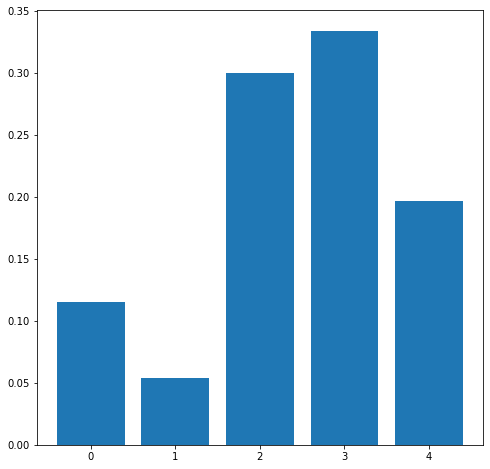

In [494]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
        
        ('Feature%d: , Score: %.5f' % (i,v))
 #plot feature importance
print('Feature 0: Air Temperature,     Score:0.11488' )
print('Feature 1: Process Temperature, Score:0.05378' )
print('Feature 2: Torque,              Score:0.30034' )
print('Feature 3: Rotational speed,    Score:0.33416' )
print('Feature 4: Tool wear,           Score:0.19684' )
pyplot.bar([data for data in range(len(importance))], importance)
pyplot.show()



# Applying decsion tree model

In [495]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4,)

In [496]:
model.fit(data, target2)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [508]:
test_target2

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Machine failure, Length: 2000, dtype: int64

# Prediction

In [389]:
predictions=model.predict(testinput)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [390]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### The predict_proba() method
In the context of classification tasks, some sklearn estimators also implement the predict_proba method that returns the class probabilities for each data point.

The method accepts a single argument that corresponds to the data over which the probabilities will be computed and returns an array of lists containing the class probabilities for the input data points.

In [391]:
model.predict_proba(testinput)

array([[0.98860399, 0.01139601],
       [0.998446  , 0.001554  ],
       [0.998446  , 0.001554  ],
       ...,
       [0.998446  , 0.001554  ],
       [0.998446  , 0.001554  ],
       [0.58974359, 0.41025641]])

# Comparison with the test model

## Accuracy score

In [392]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target2, predictions)

0.9705

## fscore

In [438]:
sklearn.metrics.f1_score(test_target2, predictions,  labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')



0.40404040404040403

## Confsuin matrix

In [445]:
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target2, predictions, labels=[0,1])

cm

array([[1921,    4],
       [  55,   20]])

In [394]:
feature_names=data.columns
feature_names

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

# Visualization of decision tree

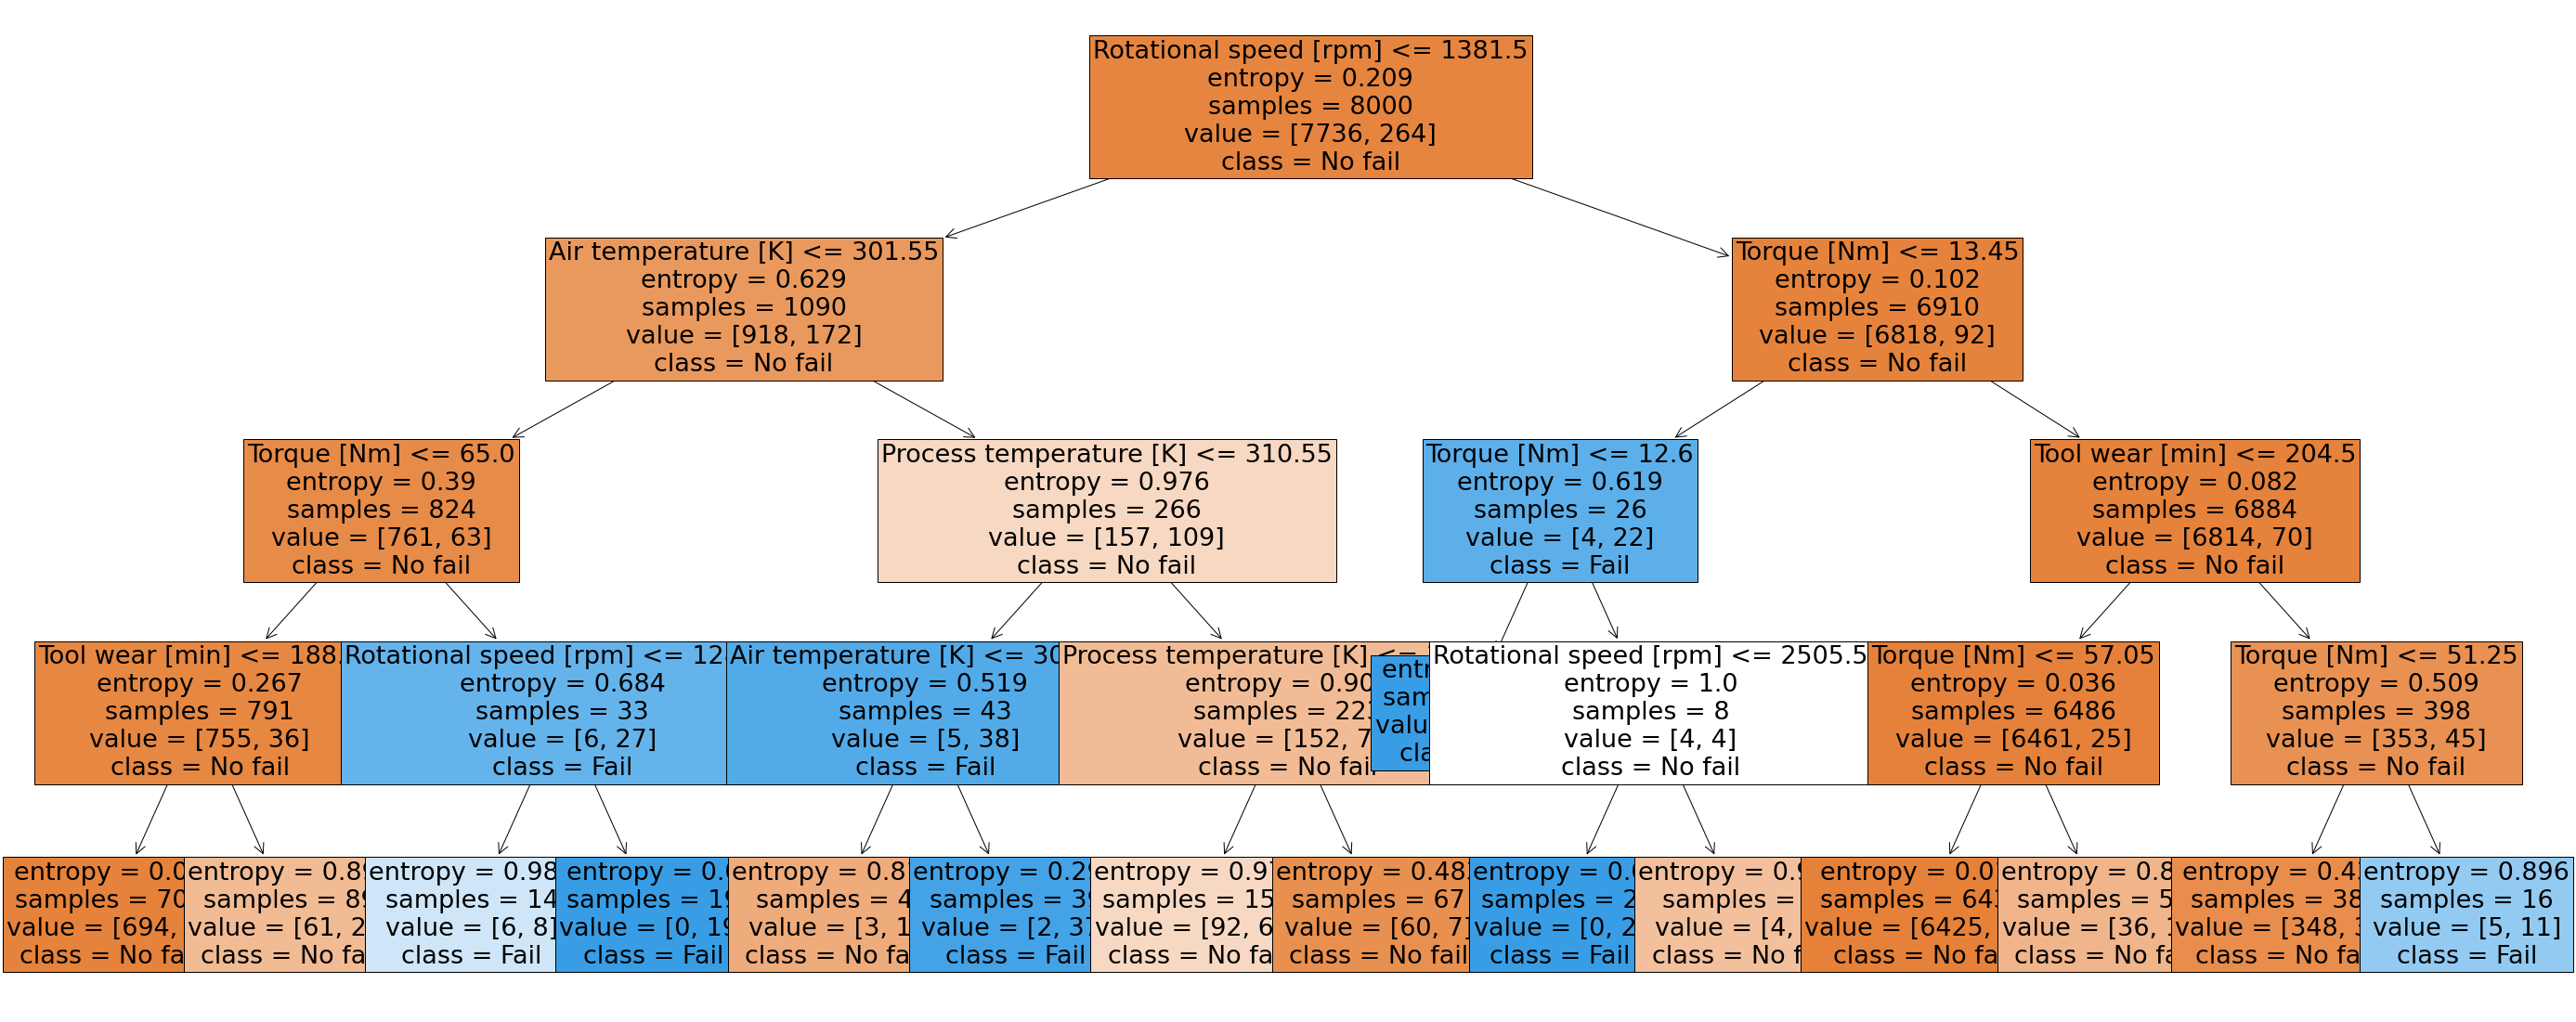

In [425]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(49,20))
_ = tree.plot_tree(model,
                  feature_names=feature_names,
                  class_names = {0: 'No fail', 1: 'Fail'},
                   filled = True,
                   fontsize=27)

In [412]:
randomTWF=dftest[dftest['TWF'] == 1]
randomTWF


,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
10,1087,1088,H30501,H,296.9,307.8,1549,35.8,206,1,1,0,0,0,0
66,6419,6420,H35833,H,300.3,309.9,1394,46.7,210,1,1,0,0,0,0
161,6759,6760,L53939,L,301.7,311.0,1441,44.3,208,1,1,0,0,0,0
216,5141,5142,L52321,L,304.4,313.7,1509,35.0,205,1,1,0,0,0,0
906,8690,8691,L55870,L,297.1,308.5,1323,44.4,207,1,1,0,0,0,0
1234,9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
1371,3611,3612,L50791,L,301.7,310.9,1405,46.4,207,1,1,0,0,0,1
1445,1509,1510,L48689,L,298.0,308.5,1429,37.7,220,1,1,0,0,0,0
1565,8846,8847,M23706,M,297.4,308.8,1325,62.4,204,1,1,0,0,1,0
1961,2244,2245,M17104,M,299.3,308.4,1542,37.5,203,1,1,0,0,0,0


In [407]:
randomPWF=dftest[dftest['PWF'] == 1]
randomPWF

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
35,5334,5335,M20194,M,303.4,312.6,2706,9.8,65,1,0,0,1,0,0
47,5615,5616,M20475,M,303.0,312.2,1257,71.3,122,1,0,0,1,0,0
141,7569,7570,L54749,L,300.2,311.0,1255,71.8,149,1,0,0,1,0,0
417,4254,4255,L51434,L,302.6,311.0,1284,68.0,114,1,0,1,1,0,0
421,1095,1096,L48275,L,296.9,307.5,2721,9.3,18,1,0,0,1,0,0
441,3140,3141,H32554,H,300.4,309.9,2563,12.8,81,1,0,0,1,0,0
905,6678,6679,M21538,M,301.5,310.7,1336,65.6,0,1,0,0,1,0,0
935,8398,8399,L55578,L,298.5,309.7,2617,12.1,102,1,0,0,1,0,0
954,6178,6179,L53358,L,301.1,310.9,1282,67.9,10,1,0,0,1,0,0
1058,8307,8308,M23167,M,298.7,310.1,1402,69.7,64,1,0,0,1,0,0


In [408]:
randomOSF=dftest[dftest['OSF'] == 1]
randomOSF

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
134,9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
173,1085,1086,L48265,L,297.0,307.8,1385,56.4,202,1,0,0,0,1,0
213,4643,4644,L51823,L,303.2,311.4,1324,54.2,228,1,0,1,0,1,0
303,8195,8196,L55375,L,299.4,310.8,1376,53.9,215,1,0,0,0,1,0
385,7509,7510,L54689,L,300.6,311.9,1372,60.1,212,1,0,0,0,1,0
414,242,243,L47422,L,298.0,308.2,1348,58.8,202,1,0,0,0,1,0
484,5399,5400,H34813,H,302.8,312.4,1411,53.8,246,1,0,0,0,1,0
557,1167,1168,L48347,L,297.0,308.1,1362,52.5,213,1,0,0,0,1,0
676,3019,3020,L50199,L,300.5,309.8,1379,54.2,207,1,0,0,0,1,0
739,6924,6925,L54104,L,301.2,311.6,1461,52.9,208,1,0,0,0,1,0


In [36]:
df.describe()

,Unnamed: 0,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4983.683000,4984.683000,299.991175,309.993662,1538.903625,39.961162,107.219750,0.033000,0.004500,0.011625,0.009625,0.009375,0.001875
std,2893.028418,2893.028418,2.010565,1.493085,179.176596,9.956695,63.807796,0.178648,0.066935,0.107197,0.097640,0.096376,0.043263
min,0.000000,1.000000,295.300000,305.700000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2473.750000,2474.750000,298.300000,308.800000,1423.000000,33.200000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4985.500000,4986.500000,300.100000,310.000000,1503.000000,40.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7493.250000,7494.250000,301.500000,311.000000,1611.250000,46.700000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9998.000000,9999.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Number of failures in the dataset

In [37]:
mf_num=df['Machine failure'].value_counts()
mf_num

0    7736
1     264
Name: Machine failure, dtype: int64

In [38]:
twf_num=df['TWF'].value_counts()
twf_num

0    7964
1      36
Name: TWF, dtype: int64

In [39]:
hdf_num=df['HDF'].value_counts()
hdf_num

0    7907
1      93
Name: HDF, dtype: int64

In [40]:
pwf_num=df['PWF'].value_counts()
pwf_num

0    7923
1      77
Name: PWF, dtype: int64

In [41]:
osf_num=df['OSF'].value_counts()
osf_num

0    7925
1      75
Name: OSF, dtype: int64

In [42]:
rnf_num=df['RNF'].value_counts()
rnf_num

0    7985
1      15
Name: RNF, dtype: int64

# Pie chart failureperctage

([<matplotlib.patches.Wedge at 0x7f8668a16220>,
 [Text(-1.0926360048123307, 0.12706911893827133, 'No failure'),
  Text(1.0740908870273038, -0.23733682058395383, 'TWF'),
  Text(1.0846940141308388, -0.18286305178665183, 'HDF'),
  Text(1.094447149463139, -0.11038766702856731, 'PWF'),
  Text(1.099072457953791, -0.045163394108644214, 'OSF'),
  Text(1.0999810677049549, -0.006453734629497281, 'RNF')])

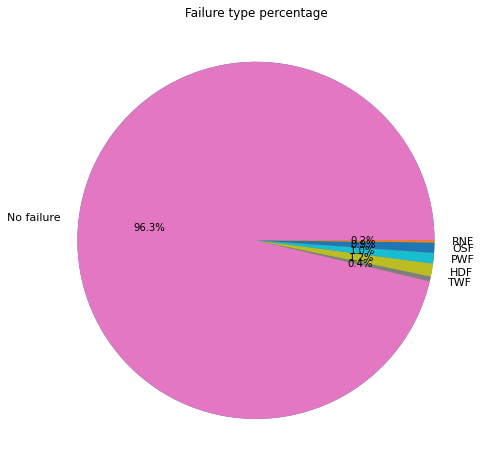

In [482]:
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)
plt.title('Failure type percentage')
plt.axis('equal')
   
#colors = ['#E1728F', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']

sizes = [7736, 36, 93, 77, 75, 15]
labels = 'No failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'



plt.pie(sizes, autopct='%1.1f%%')
#plt.pie(sizes, explode=(0, 0.1, 0.3, 0.5, 0.7, 0.9))

plt.pie(sizes, labels=labels,
      textprops={'fontsize': 11})










([<matplotlib.patches.Wedge at 0x7fc35113b520>,
 [Text(-1.0940938959190392, 0.11383561355173047, 'No failure'),
  Text(1.0940938985835535, -0.11383558794261499, 'Failure')])

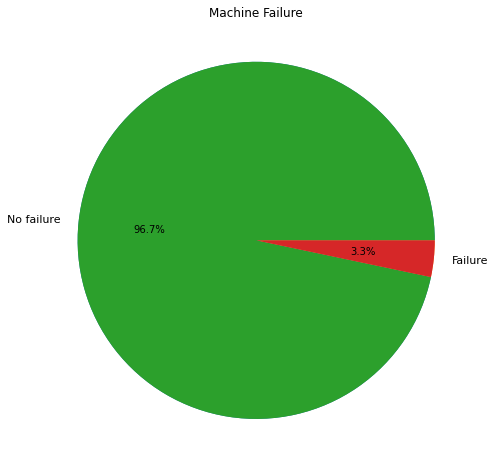

In [1]:
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)
plt.title('Machine Failure')
plt.axis('equal')
   
#colors = ['#E1728F', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']

sizes = [7736, 264]
labels = 'No failure', 'Failure'



plt.pie(sizes, autopct='%1.1f%%')
#plt.pie(sizes, explode=(0, 0.1, 0.3, 0.5, 0.7, 0.9))

plt.pie(sizes, labels=labels,
      textprops={'fontsize': 11})

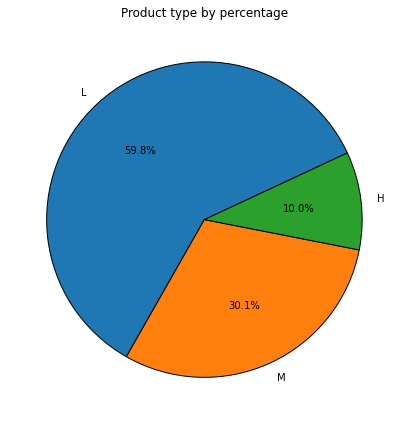

In [44]:
plt.rcParams["figure.figsize"] = (6,6)
plt.pie(df['Type'].value_counts(), labels=['L', 'M', 'H'],
    autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, startangle=25)

plt.title('Product type by percentage')
plt.tight_layout()

In [56]:
df_failure = df[df['Machine failure'] == 1]

In [50]:
df_failure = df[df['Machine failure'] == 1]
df_failure['TWF'].value_counts()

0    228
1     36
Name: TWF, dtype: int64

In [51]:
df_failure = df[df['Machine failure'] == 1]
df_failure['PWF'].value_counts()

0    187
1     77
Name: PWF, dtype: int64

In [52]:
df_failure = df[df['Machine failure'] == 1]
df_failure['OSF'].value_counts()

0    189
1     75
Name: OSF, dtype: int64

## Machine failure never happened because of RNF?

In [53]:
df_failure = df[df['Machine failure'] == 1]
df_failure['RNF'].value_counts()

0    264
Name: RNF, dtype: int64

## Machine failure did not happen, but RNF is set to 1

In [54]:
df_failure = df[df['Machine failure'] == 0]
df_failure['RNF'].value_counts()

0    7721
1      15
Name: RNF, dtype: int64

In [65]:
rnf_error=df[df['RNF'] == 1]
rnf_error_disp=rnf_error[["Air temperature [K]",
           "Process temperature [K]",
           "Rotational speed [rpm]",
           "Torque [Nm]",
           "Tool wear [min]",
           "Machine failure",
                         "RNF"]]
rnf_error_disp


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,RNF
187,302.6,312.1,1499,35.0,215,0,1
1150,300.4,311.9,1438,46.7,41,0,1
1484,302.9,312.5,1357,55.0,12,0,1
2727,298.6,309.8,1505,45.7,144,0,1
2858,302.6,312.1,1668,28.7,180,0,1
3341,299.3,309.0,1447,50.4,140,0,1
3368,302.5,311.9,1306,59.7,172,0,1
4369,299.6,309.5,1570,35.5,189,0,1
4877,301.6,310.5,1602,32.3,2,0,1
4896,300.8,311.2,1481,38.5,181,0,1


# Correlation heat map

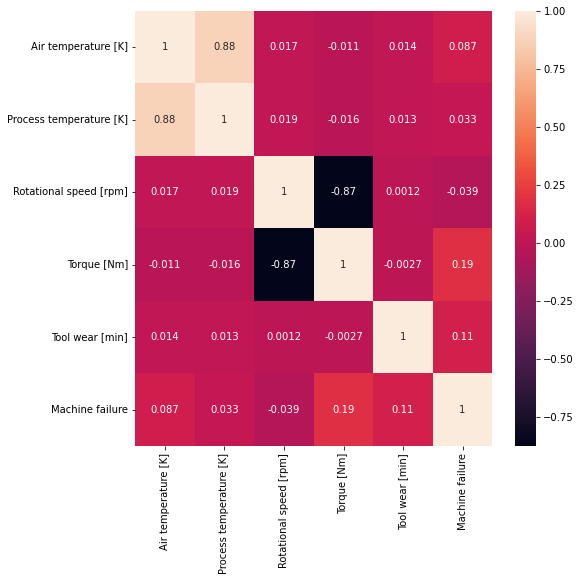

In [185]:
import seaborn as sns
sns.pairplot(torque_and_rotspeed, hue='Machine failure', palette='husl')

plt.figure(figsize=(8, 8))
sns.heatmap(input_target.corr(), annot=True)
plt.show()

In [411]:
randomHDF=dftest[dftest['HDF'] == 1]
randomHDF

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
71,4185,4186,L51365,L,302.2,310.6,1348,48.4,161,1,0,1,0,0,0
213,4643,4644,L51823,L,303.2,311.4,1324,54.2,228,1,0,1,0,1,0
280,4087,4088,L51267,L,301.9,310.4,1376,54.9,126,1,0,1,0,0,0
288,4737,4738,M19597,M,303.2,311.5,1336,58.2,2,1,0,1,0,0,0
417,4254,4255,L51434,L,302.6,311.0,1284,68.0,114,1,0,1,1,0,0
481,4501,4502,L51681,L,302.5,310.2,1307,54.0,86,1,0,1,0,0,0
516,4558,4559,L51738,L,302.7,310.7,1369,47.5,11,1,0,1,0,0,0
678,4406,4407,L51586,L,302.5,310.3,1326,58.5,55,1,0,1,0,0,0
758,4579,4580,L51759,L,303.0,311.2,1374,48.2,65,1,0,1,0,0,0
768,4138,4139,L51318,L,301.7,310.2,1311,57.4,40,1,0,1,0,0,0


In [517]:
randomRNFtrain=df[df['RNF'] == 1]
randomRNFtrain


,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
187,5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
1150,7868,7869,H37282,H,300.4,311.9,1438,46.7,41,0,0,0,0,0,1
1484,5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1
2727,1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
2858,5639,5640,L52819,L,302.6,312.1,1668,28.7,180,0,0,0,0,0,1
3341,2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3368,5553,5554,L52733,L,302.5,311.9,1306,59.7,172,0,0,0,0,0,1
4369,2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
4877,3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
4896,6913,6914,L54093,L,300.8,311.2,1481,38.5,181,0,0,0,0,0,1


# Random Forest

In [344]:
target2

array([0, 1, 1, ..., 0, 0, 1])

In [351]:
rf = sklearn.ensemble.RandomForestClassifier(max_depth=4)
rf.fit(data, target2)

RandomForestClassifier(max_depth=4)

In [354]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [352]:
rf.score(testinput, test_target2)

0.971

In [357]:
pred = rf.predict(testinput)


In [358]:
rf.predict_proba(testinput)

array([[0.9633313 , 0.0366687 ],
       [0.99121722, 0.00878278],
       [0.99295435, 0.00704565],
       ...,
       [0.99223888, 0.00776112],
       [0.99295435, 0.00704565],
       [0.9052123 , 0.0947877 ]])

In [359]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target2, pred)

0.971

## F1 score

In [439]:
sklearn.metrics.f1_score(test_target2, pred,  labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')



0.38297872340425526

In [360]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target2, pred, labels=[0,1])

array([[1924,    1],
       [  57,   18]])

In [323]:
estimator = rf.estimators_[1]

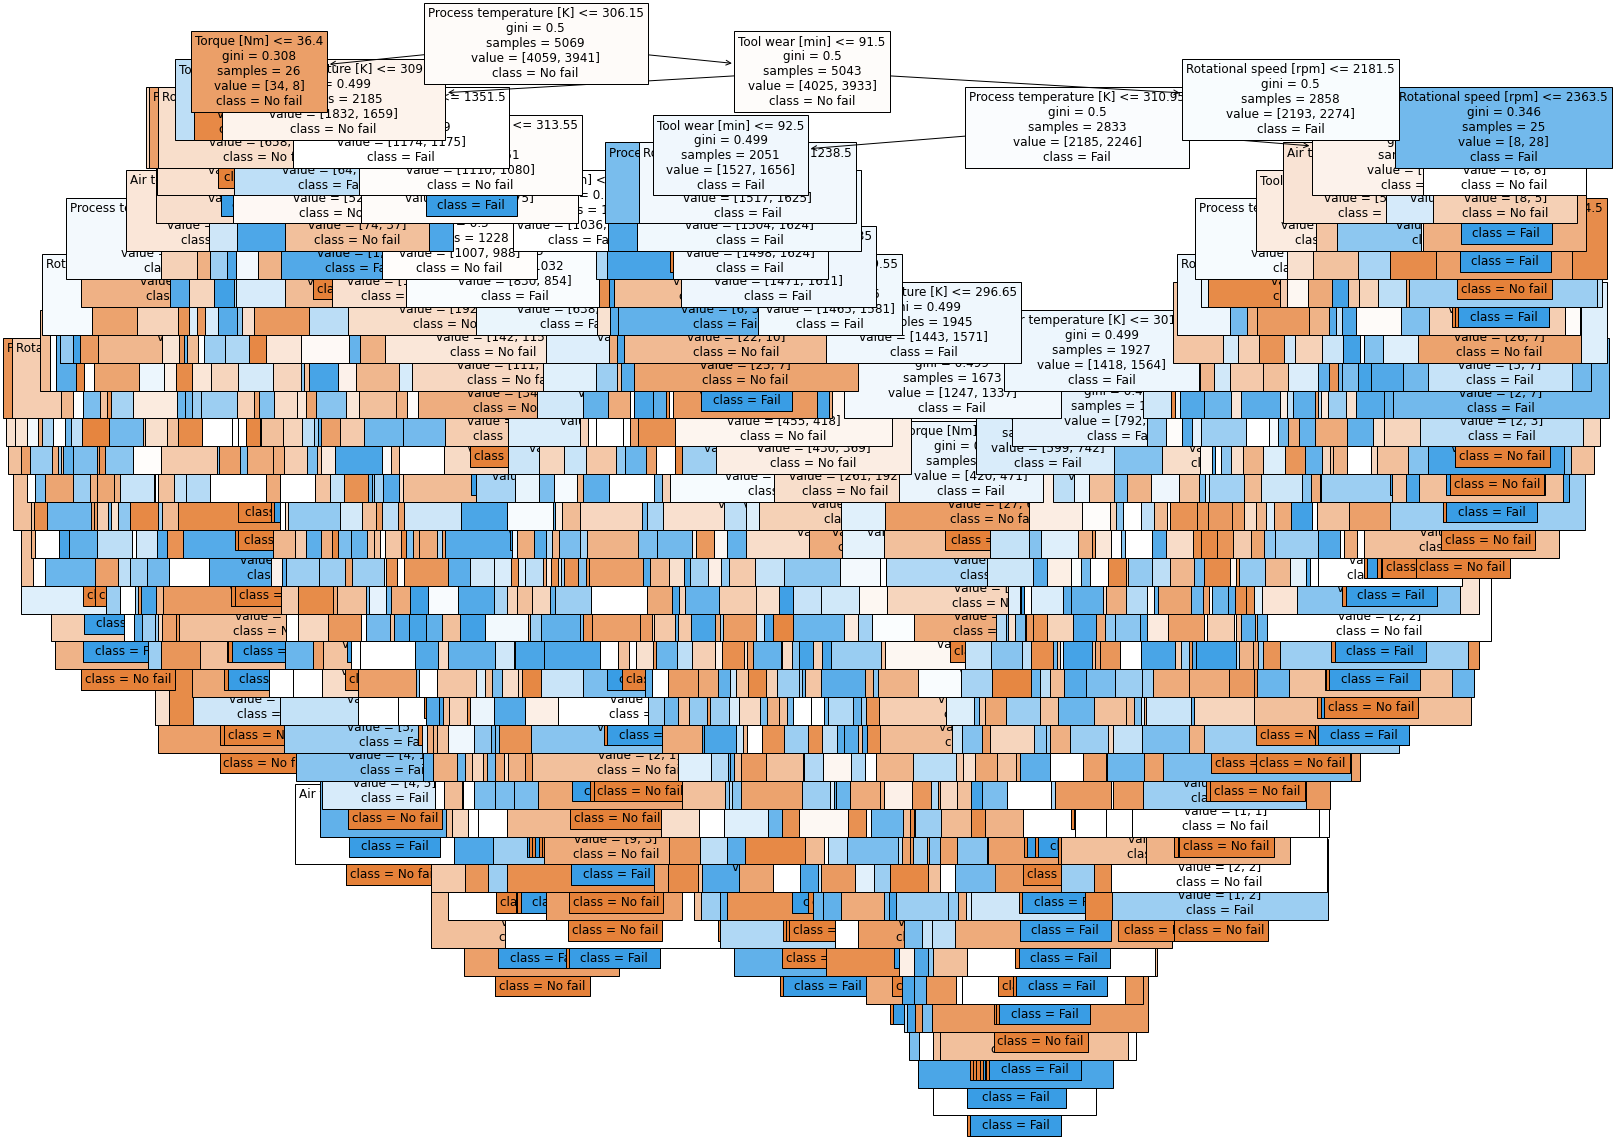

In [322]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rf[1],
                  feature_names=feature_names,
                  class_names = {0: 'No fail', 1: 'Fail'},
                   filled = True,
                   fontsize=12)